# <center>MDS6212 Fintech Theory and Practice: Week 3 Assignment<center>

----
    
**220041006 *Yihang Li***

**Data confidential requirements:** 
*     Do not share datasets with others
*     Do not post datasets on the Web site
*     Datasets can only be used to work on assignments of MDS6212, M.Sc. in Data Science, CUHK-Shenzhen.

**Datasets:** 
*     MDS6212 Week 3 Stock returns.xlsx
*     MDS6212 Week 3 Online sales.xlsx

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-the-data-set-of-stock-returns,-sort-stocks-into-quintiles-by-size-every-quarter,-hold-stocks-over-the-quarter,-and-calculate-monthly-portfolio-returns" data-toc-modified-id="Using-the-data-set-of-stock-returns,-sort-stocks-into-quintiles-by-size-every-quarter,-hold-stocks-over-the-quarter,-and-calculate-monthly-portfolio-returns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using the data set of stock returns, sort stocks into quintiles by size every quarter, hold stocks over the quarter, and calculate monthly portfolio returns</a></span></li><li><span><a href="#Using-the-data-set-of-stock-returns,-sort-stocks-into-quintiles-by-institutional-ownership-every-quarter,-hold-stocks-over-the-quarter,-and-calculate-monthly-portfolio-returns" data-toc-modified-id="Using-the-data-set-of-stock-returns,-sort-stocks-into-quintiles-by-institutional-ownership-every-quarter,-hold-stocks-over-the-quarter,-and-calculate-monthly-portfolio-returns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using the data set of stock returns, sort stocks into quintiles by institutional ownership every quarter, hold stocks over the quarter, and calculate monthly portfolio returns</a></span></li><li><span><a href="#Using-the-data-set-of-stock-returns,-perform-panel-regression,-and-regress-stock-returns-on-firm-characteristics-such-as-size,-book-to-market-ratio,-return12,-roa,-leverage,-ppe,-intang,-number-of-analysts,-institutional-ownership,-controlling-for-or-not-for-firm-and-year-month-fixed-effects.-Cluster-standard-errors-by-firm-and-year-month-(double-clustering)" data-toc-modified-id="Using-the-data-set-of-stock-returns,-perform-panel-regression,-and-regress-stock-returns-on-firm-characteristics-such-as-size,-book-to-market-ratio,-return12,-roa,-leverage,-ppe,-intang,-number-of-analysts,-institutional-ownership,-controlling-for-or-not-for-firm-and-year-month-fixed-effects.-Cluster-standard-errors-by-firm-and-year-month-(double-clustering)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using the data set of stock returns, perform panel regression, and regress stock returns on firm characteristics such as size, book-to-market ratio, return12, roa, leverage, ppe, intang, number of analysts, institutional ownership, controlling for or not for firm and year-month fixed effects. Cluster standard errors by firm and year-month (double clustering)</a></span><ul class="toc-item"><li><span><a href="#Data-Formats-for-Panel-Data-Analysis" data-toc-modified-id="Data-Formats-for-Panel-Data-Analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Formats for Panel Data Analysis</a></span></li><li><span><a href="#year-month-fixed-effects" data-toc-modified-id="year-month-fixed-effects-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>year-month fixed effects</a></span></li><li><span><a href="#firm-fixed-effects" data-toc-modified-id="firm-fixed-effects-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>firm fixed effects</a></span></li><li><span><a href="#firm-and-year-month-fixed-effects" data-toc-modified-id="firm-and-year-month-fixed-effects-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>firm and year-month fixed effects</a></span></li><li><span><a href="#Comparing-models" data-toc-modified-id="Comparing-models-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparing models</a></span></li><li><span><a href="#Cluster-standard-errors-by-firm-and-year-month-(double-clustering)" data-toc-modified-id="Cluster-standard-errors-by-firm-and-year-month-(double-clustering)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Cluster standard errors by firm and year-month (double clustering)</a></span></li></ul></li><li><span><a href="#Using-the-data-set-of-Online-sales,-aggregate-monthly-online-sales-over-quarters,-download-reported-quarterly-total-sales-from-CSMAR,-and-plot-figures-including-both-online-sales-and-reported-quarterly-sales." data-toc-modified-id="Using-the-data-set-of-Online-sales,-aggregate-monthly-online-sales-over-quarters,-download-reported-quarterly-total-sales-from-CSMAR,-and-plot-figures-including-both-online-sales-and-reported-quarterly-sales.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using the data set of Online sales, aggregate monthly online sales over quarters, download reported quarterly total sales from CSMAR, and plot figures including both online sales and reported quarterly sales.</a></span><ul class="toc-item"><li><span><a href="#aggregate-monthly-online-sales-over-quarters" data-toc-modified-id="aggregate-monthly-online-sales-over-quarters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>aggregate monthly online sales over quarters</a></span></li><li><span><a href="#Download-reported-quarterly-total-sales-from-CSMAR" data-toc-modified-id="Download-reported-quarterly-total-sales-from-CSMAR-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Download reported quarterly total sales from CSMAR</a></span></li><li><span><a href="#Plot-figures-including-both-online-sales-and-reported-quarterly-sales." data-toc-modified-id="Plot-figures-including-both-online-sales-and-reported-quarterly-sales.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plot figures including both online sales and reported quarterly sales.</a></span></li></ul></li></ul></div>

<!-- import numpy as np
import pandas as pd -->

## Using the data set of stock returns, sort stocks into quintiles by size every quarter, hold stocks over the quarter, and calculate monthly portfolio returns

In [3]:
Stock_returns = pd.read_excel('MDS6212 Week 3 Stock returns.xlsx', sheet_name='data')
Stock_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87432 entries, 0 to 87431
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stkcd       87432 non-null  int64  
 1   stknme      87432 non-null  object 
 2   conme       87432 non-null  object 
 3   month       87432 non-null  object 
 4   retrf       87432 non-null  float64
 5   mktrf       87432 non-null  float64
 6   smb         87432 non-null  float64
 7   hml         87432 non-null  float64
 8   umd         87432 non-null  float64
 9   size        87432 non-null  float64
 10  bm          87432 non-null  float64
 11  return12    87432 non-null  float64
 12  roa         87432 non-null  float64
 13  lev         87432 non-null  float64
 14  ppe         87432 non-null  float64
 15  intang      87432 non-null  float64
 16  numanalyst  87432 non-null  int64  
 17  instown     87432 non-null  float64
 18  mv          87432 non-null  int64  
dtypes: float64(13), int64(3),

In [4]:
Stock_returns.head()

,stkcd,stknme,conme,month,retrf,mktrf,smb,hml,umd,size,bm,return12,roa,lev,ppe,intang,numanalyst,instown,mv
0,9,中国宝安,中国宝安集团股份有限公司,2013-07,9.0756,1.8833,5.1896,-0.1922,6.1829,23.10871,0.438860,13.37412,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952
1,9,中国宝安,中国宝安集团股份有限公司,2013-08,-5.1363,4.5833,5.9407,0.0976,-5.5041,23.10871,0.438860,13.37412,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952
2,9,中国宝安,中国宝安集团股份有限公司,2013-09,3.5840,3.3833,0.5848,2.8554,8.8693,23.10871,0.438860,13.37412,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952
3,9,中国宝安,中国宝安集团股份有限公司,2014-01,-1.0932,-3.6167,5.6921,1.1126,8.9357,23.28204,0.394303,46.59159,0.025973,0.432246,0.098660,0.029798,0,5.6741,11731143680
4,9,中国宝安,中国宝安集团股份有限公司,2014-02,19.0704,0.9833,3.8899,0.6902,-1.8764,23.28204,0.394303,46.59159,0.025973,0.432246,0.098660,0.029798,0,5.6741,11731143680


<!-- Stock_returns['month'] = pd.to_datetime(Stock_returns['month'], format='%Y-%m') #.dt.strftime('%Y-%m')
# Groupby quarterly
Groupby_quarterly = Stock_returns.groupby(Stock_returns['month'].dt.to_period('Q'))
# Try to get the key
Group_Keys = list(Groupby_quarterly.groups) -->

In [6]:
for key, group in Groupby_quarterly:
    print(key, ': the quintiles size are', group['size'].quantile(0.2),
          group['size'].quantile(0.4), group['size'].quantile(0.6),
          group['size'].quantile(0.8), group['size'].quantile(1),
          'respectivly.')
#sort stocks into quintiles by size every quarter
    First = group[group['size'] <= group['size'].quantile(0.2)].reset_index()
    Second = group[(group['size'] <= group['size'].quantile(0.4)) & (
        group['size'] > group['size'].quantile(0.2))].reset_index()
    Third = group[(group['size'] <= group['size'].quantile(0.6)) &
                  (group['size'] > group['size'].quantile(0.4))].reset_index()
    Fourth = group[(group['size'] <= group['size'].quantile(0.8)) & (
        group['size'] > group['size'].quantile(0.6))].reset_index()
    Fifth = group[(group['size'] <= group['size'].quantile(1)) &
                  (group['size'] > group['size'].quantile(0.8))].reset_index()

#hold stocks over the quarter, and calculate monthly portfolio returns weighted by mv (market value)
    First['weight'] = First['mv'] / First['mv'].sum()
    Second['weight'] = Second['mv'] / Second['mv'].sum()
    Third['weight'] = Third['mv'] / Third['mv'].sum()
    Fourth['weight'] = Fourth['mv'] / Fourth['mv'].sum()
    Fifth['weight'] = Fifth['mv'] / Fifth['mv'].sum()

    Portfolio_First = First['weight'].dot(First['retrf'])
    Portfolio_Second = Second['weight'].dot(Second['retrf'])
    Portfolio_Third = Third['weight'].dot(Third['retrf'])
    Portfolio_Fourth = Fourth['weight'].dot(Fourth['retrf'])
    Portfolio_Fifth = Fifth['weight'].dot(Fifth['retrf'])

    print("#" * 20, key, "#" * 20)
    print(
        "After sort stocks into quintiles by size every quarter", '\n',
        "the monthly portfolio returns weighted by market value of: Fisrt quintile is", Portfolio_First,
        '\n', "the monthly portfolio returns weighted by market value of: Second quintile is",
        Portfolio_Second, '\n',
        "the monthly portfolio returns weighted by market value of: Third quintile is", Portfolio_Third,
        '\n', "the monthly portfolio returns weighted by market value of: Fourth quintile is",
        Portfolio_Fourth, '\n',
        "the monthly portfolio returns weighted by market value of: Fifth quintile is", Portfolio_Fifth)
    print("#" * 60)

2012Q2 : the quintiles size are 21.32591 21.6943 22.04578 22.66286 28.08662 respectivly.
#################### 2012Q2 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is -1.0948317304800814 
 the monthly portfolio returns weighted by market value of: Second quintile is 0.6517450687480695 
 the monthly portfolio returns weighted by market value of: Third quintile is 1.2373100473703458 
 the monthly portfolio returns weighted by market value of: Fourth quintile is 0.2188063469501672 
 the monthly portfolio returns weighted by market value of: Fifth quintile is -1.2361876312917217
############################################################
2012Q3 : the quintiles size are 21.271824000000002 21.64703 22.01655 22.623397999999998 28.08148 respectivly.
#################### 2012Q3 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weight

#################### 2016Q2 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is 1.6623946800520601 
 the monthly portfolio returns weighted by market value of: Second quintile is 2.66835218839615 
 the monthly portfolio returns weighted by market value of: Third quintile is 2.9272103484599503 
 the monthly portfolio returns weighted by market value of: Fourth quintile is 1.177301153805724 
 the monthly portfolio returns weighted by market value of: Fifth quintile is -0.6083471821781181
############################################################
2016Q3 : the quintiles size are 22.302341999999996 22.616453999999997 22.937438 23.419638000000003 27.83984 respectivly.
#################### 2016Q3 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is 1.4258524662898568 
 the monthly portfoli

#################### 2019Q1 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is 10.338285399450193 
 the monthly portfolio returns weighted by market value of: Second quintile is 11.33106976698981 
 the monthly portfolio returns weighted by market value of: Third quintile is 11.28857563226816 
 the monthly portfolio returns weighted by market value of: Fourth quintile is 10.865454328475277 
 the monthly portfolio returns weighted by market value of: Fifth quintile is 7.8216696383446624
############################################################
2019Q2 : the quintiles size are 21.5204 21.882710000000003 22.25014 22.89017 26.90239 respectivly.
#################### 2019Q2 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is -1.2944885011668883 
 the monthly portfolio returns weighted by

## Using the data set of stock returns, sort stocks into quintiles by institutional ownership every quarter, hold stocks over the quarter, and calculate monthly portfolio returns

In [7]:
for key, group in Groupby_quarterly:
    print(key, ': the quintiles instown are', group['instown'].quantile(0.2),
          group['instown'].quantile(0.4), group['instown'].quantile(0.6),
          group['instown'].quantile(0.8), group['instown'].quantile(1), 'respectivly.')
    
#sort stocks into quintiles by institutional ownership every quarter
    First = group[group['instown'] <= group['instown'].quantile(0.2)].reset_index()
    Second = group[(group['instown'] <= group['instown'].quantile(0.4)) & (
        group['instown'] > group['instown'].quantile(0.2))].reset_index()
    Third = group[(group['instown'] <= group['instown'].quantile(0.6)) &
                  (group['instown'] > group['instown'].quantile(0.4))].reset_index()
    Fourth = group[(group['instown'] <= group['instown'].quantile(0.8)) & (
        group['instown'] > group['instown'].quantile(0.6))].reset_index()
    Fifth = group[(group['instown'] <= group['instown'].quantile(1)) &
                  (group['instown'] > group['instown'].quantile(0.8))].reset_index()

#hold stocks over the quarter, and calculate monthly portfolio returns weighted by market value
    First['weight'] = First['mv'] / First['mv'].sum()
    Second['weight'] = Second['mv'] / Second['mv'].sum()
    Third['weight'] = Third['mv'] / Third['mv'].sum()
    Fourth['weight'] = Fourth['mv'] / Fourth['mv'].sum()
    Fifth['weight'] = Fifth['mv'] / Fifth['mv'].sum()

    Portfolio_First = First['weight'].dot(First['retrf'])
    Portfolio_Second = Second['weight'].dot(Second['retrf'])
    Portfolio_Third = Third['weight'].dot(Third['retrf'])
    Portfolio_Fourth = Fourth['weight'].dot(Fourth['retrf'])
    Portfolio_Fifth = Fifth['weight'].dot(Fifth['retrf'])

    print("#" * 20, key, "#" * 20)
    print(
        "After sort stocks into quintiles by size every quarter", '\n',
        "the monthly portfolio returns weighted by market value of: Fisrt quintile is", Portfolio_First,
        '\n', "the monthly portfolio returns weighted by market value of: Second quintile is",
        Portfolio_Second, '\n',
        "the monthly portfolio returns weighted by market value of: Third quintile is", Portfolio_Third,
        '\n', "the monthly portfolio returns weighted by market value of: Fourth quintile is",
        Portfolio_Fourth, '\n',
        "the monthly portfolio returns weighted by market value of: Fifth quintile is", Portfolio_Fifth)
    print("#" * 60)

2012Q2 : the quintiles instown are 0.804 3.4267 7.4483 16.2503 59.0109 respectivly.
#################### 2012Q2 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is -1.7724779451858177 
 the monthly portfolio returns weighted by market value of: Second quintile is -2.759669084525224 
 the monthly portfolio returns weighted by market value of: Third quintile is 1.1906890107162706 
 the monthly portfolio returns weighted by market value of: Fourth quintile is 0.8069373046159043 
 the monthly portfolio returns weighted by market value of: Fifth quintile is 1.2205498572591813
############################################################
2012Q3 : the quintiles instown are 0.5764999999999996 3.9008000000000003 9.4383 20.47526 74.9974 respectivly.
#################### 2012Q3 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by 

2016Q3 : the quintiles instown are 1.3823800000000006 3.805960000000004 8.216219999999996 14.906360000000003 84.66129 respectivly.
#################### 2016Q3 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is 0.32435754955469953 
 the monthly portfolio returns weighted by market value of: Second quintile is 1.1322017427076012 
 the monthly portfolio returns weighted by market value of: Third quintile is 0.3621881689307437 
 the monthly portfolio returns weighted by market value of: Fourth quintile is 0.5491325834851069 
 the monthly portfolio returns weighted by market value of: Fifth quintile is 0.3836543921058825
############################################################
2016Q4 : the quintiles instown are 1.1323 2.8207 5.5447 10.8532 83.9634 respectivly.
#################### 2016Q4 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfoli

#################### 2019Q2 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is -4.158362896931211 
 the monthly portfolio returns weighted by market value of: Second quintile is -3.4686495472171504 
 the monthly portfolio returns weighted by market value of: Third quintile is -2.622645302979686 
 the monthly portfolio returns weighted by market value of: Fourth quintile is -3.2031046114215997 
 the monthly portfolio returns weighted by market value of: Fifth quintile is -0.7657357949774656
############################################################
2019Q3 : the quintiles instown are 0.06658000000000003 0.61 2.6947 8.619360000000004 85.2298 respectivly.
#################### 2019Q3 ####################
After sort stocks into quintiles by size every quarter 
 the monthly portfolio returns weighted by market value of: Fisrt quintile is -1.8364409959031398 
 the monthly portfolio returns

## Using the data set of stock returns, perform panel regression, and regress stock returns on firm characteristics such as size, book-to-market ratio, return12, roa, leverage, ppe, intang, number of analysts, institutional ownership, controlling for or not for firm and year-month fixed effects. Cluster standard errors by firm and year-month (double clustering)    
[Reference](https://bashtage.github.io/linearmodels/panel/examples/examples.html)

In [8]:
Stock_returns.head(1)

,stkcd,stknme,conme,month,retrf,mktrf,smb,hml,umd,size,bm,return12,roa,lev,ppe,intang,numanalyst,instown,mv
0,9,中国宝安,中国宝安集团股份有限公司,2013-07-01,9.0756,1.8833,5.1896,-0.1922,6.1829,23.10871,0.43886,13.37412,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952


### Data Formats for Panel Data Analysis
    Here's one method to express data: 
        MultiIndex DataFrames where the outer index is the entity and the inner is the time index. This requires using pandas.

In [9]:
month = pd.Categorical(Stock_returns.month)
data = Stock_returns.set_index(['conme', 'month'])
data['month'] = month
data.head()

stkcd stknme    retrf   mktrf     smb     hml  \
conme        month                                                       
中国宝安集团股份有限公司 2013-07-01      9   中国宝安   9.0756  1.8833  5.1896 -0.1922   
             2013-08-01      9   中国宝安  -5.1363  4.5833  5.9407  0.0976   
             2013-09-01      9   中国宝安   3.5840  3.3833  0.5848  2.8554   
             2014-01-01      9   中国宝安  -1.0932 -3.6167  5.6921  1.1126   
             2014-02-01      9   中国宝安  19.0704  0.9833  3.8899  0.6902   

                            umd      size        bm  return12       roa  \
conme        month                                                        
中国宝安集团股份有限公司 2013-07-01  6.1829  23.10871  0.438860  13.37412  0.007949   
             2013-08-01 -5.5041  23.10871  0.438860  13.37412  0.007949   
             2013-09-01  8.8693  23.10871  0.438860  13.37412  0.007949   
             2014-01-01  8.9357  23.28204  0.394303  46.59159  0.025973   
             2014-02-01 -1.8764  23.28204  0.394303  46.59159  0.025973   

                              lev       ppe    intang  numanalyst  instown  \
conme        month                                                           
中国宝安集团股份有限公司 2013-07-01  0.430605  0.086185  0.031575           0   6.4646   
             2013-08-01  0.430605  0.086185  0.031575           0   6.4646   
             2013-09-01  0.430605  0.086185  0.031575           0   6.4646   
             2014-01-01  0.432246  0.098660  0.029798           0   5.6741   
             2014-02-01  0.432246  0.098660  0.029798           0   5.6741   

                                  mv      month  
conme        month                               
中国宝安集团股份有限公司 2013-07-01  11874173952 2013-07-01  
             2013-08-01  11874173952 2013-08-01  
             2013-09-01  11874173952 2013-09-01  
             2014-01-01  11731143680 2014-01-01  
             2014-02-01  11731143680 2014-02-01

<!-- from linearmodels.panel import PanelOLS
import statsmodels.api as sm -->

### year-month fixed effects

In [14]:
data.columns

Index(['stkcd', 'stknme', 'retrf', 'mktrf', 'smb', 'hml', 'umd', 'size', 'bm',
       'return12', 'roa', 'lev', 'ppe', 'intang', 'numanalyst', 'instown',
       'mv', 'month'],
      dtype='object')

In [15]:
exog_vars = ['size', 'bm',
       'return12', 'roa', 'lev', 'ppe', 'intang', 'numanalyst', 'instown']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.retrf, exog, time_effects=True)
te_res = mod.fit()
te_res

Dep. Variable:,retrf,R-squared:,0.0017
Estimator:,PanelOLS,R-squared (Between):,-0.0512
No. Observations:,87432,R-squared (Within):,0.0037
Date:,"Mon, Oct 19 2020",R-squared (Overall):,0.0028
Time:,20:00:56,Log-likelihood,-3.29e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,16.498
Entities:,2035,P-value,0.0000
Avg Obs:,42.964,Distribution:,"F(9,87330)"
Min Obs:,3.0000,,
Max Obs:,93.000,F-statistic (robust):,16.498


### firm fixed effects

In [16]:
exog_vars = ['size', 'bm',
       'return12', 'roa', 'lev', 'ppe', 'intang', 'numanalyst', 'instown']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.retrf, exog, entity_effects=True)
fe_res = mod.fit()
fe_res

Dep. Variable:,retrf,R-squared:,0.0151
Estimator:,PanelOLS,R-squared (Between):,-2.0078
No. Observations:,87432,R-squared (Within):,0.0151
Date:,"Mon, Oct 19 2020",R-squared (Overall):,-0.0424
Time:,20:00:58,Log-likelihood,-3.509e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,145.82
Entities:,2035,P-value,0.0000
Avg Obs:,42.964,Distribution:,"F(9,85388)"
Min Obs:,3.0000,,
Max Obs:,93.000,F-statistic (robust):,145.82


### firm and year-month fixed effects

In [17]:
exog_vars = ['size', 'bm',
       'return12', 'roa', 'lev', 'ppe', 'intang', 'numanalyst', 'instown']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.retrf, exog, entity_effects=True, time_effects=True)
fe_te_res = mod.fit()
fe_te_res

Dep. Variable:,retrf,R-squared:,0.0123
Estimator:,PanelOLS,R-squared (Between):,-1.8962
No. Observations:,87432,R-squared (Within):,0.0111
Date:,"Mon, Oct 19 2020",R-squared (Overall):,-0.0440
Time:,20:01:03,Log-likelihood,-3.277e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,117.96
Entities:,2035,P-value,0.0000
Avg Obs:,42.964,Distribution:,"F(9,85296)"
Min Obs:,3.0000,,
Max Obs:,93.000,F-statistic (robust):,117.96


### Comparing models

In [18]:
from linearmodels.panel import compare
compare({'TE':te_res, 'FE': fe_res, 'FE_TE':fe_te_res})

,TE,FE,FE_TE
Dep. Variable,retrf,retrf,retrf
Estimator,PanelOLS,PanelOLS,PanelOLS
No. Observations,87432,87432,87432
Cov. Est.,Unadjusted,Unadjusted,Unadjusted
R-squared,0.0017,0.0151,0.0123
R-Squared (Within),0.0037,0.0151,0.0111
R-Squared (Between),-0.0512,-2.0078,-1.8962
R-Squared (Overall),0.0028,-0.0424,-0.0440
F-statistic,16.498,145.82,117.96
P-value (F-stat),0.0000,0.0000,0.0000


### Cluster standard errors by firm and year-month (double clustering)

<!-- # cluster_entity -> firm cluster_time -> year-month
clust_entity_time = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True) -->

In [20]:
clust_entity_time.variance_decomposition

Effects                    87.453027
Residual                  105.533383
Percent due to Effects      0.453156
Name: Variance Decomposition, dtype: float64

In [21]:
clust_entity_time.std_errors

const         10.611926
size           0.462582
bm             0.820639
return12       0.002749
roa            3.081132
lev            0.665829
ppe            1.046462
intang         2.334729
numanalyst     0.016836
instown        0.017262
Name: std_error, dtype: float64

## Using the data set of Online sales, aggregate monthly online sales over quarters, download reported quarterly total sales from CSMAR, and plot figures including both online sales and reported quarterly sales.

In [8]:
Online_sales = pd.read_excel('MDS6212 Week 3 Online sales.xlsx')
Online_sales.head()

,时间,晨光文具（603899.SH）,小熊电器（002959.SZ）,中炬高新（600872.SH）,中顺洁柔（002511.SZ）,煌上煌（002695.SZ）,良品铺子（603719.SH）,洽洽食品（002557.SZ）,三只松鼠（300783.SZ）,桃李面包（603866.SH),西麦食品（002956.SZ）
0,2016-01-01,3888967.80,46512908.49,289734.74,11471065.00,1026754.11,65009434.76,14621424.00,1.451850e+08,NaN,4895641.68
1,2016-02-01,3983190.45,30841997.66,152692.14,7999038.67,838209.68,18305288.42,3167168.94,2.378633e+07,NaN,1011038.61
2,2016-03-01,6395686.99,42167714.59,228973.45,14377928.60,536719.74,13782278.59,4041073.85,2.468811e+07,NaN,1778428.59
3,2016-04-01,4968614.43,32795375.19,207874.80,7701460.19,405520.30,12376698.70,4993164.26,2.503637e+07,NaN,1305881.85
4,2016-05-01,6566980.86,31152589.87,220956.36,13586298.04,580470.85,20214060.63,4658511.88,4.073393e+07,NaN,1453825.67


### aggregate monthly online sales over quarters

In [9]:
Online_sales['时间'] = pd.to_datetime(Online_sales['时间'], format='%Y-%m-%d') 
# #groupby
Online_sales.groupby(Online_sales['时间'].dt.to_period('Q')).sum().apply(
    lambda s: s.apply(lambda x: format(x, 'f')))

,晨光文具（603899.SH）,小熊电器（002959.SZ）,中炬高新（600872.SH）,中顺洁柔（002511.SZ）,煌上煌（002695.SZ）,良品铺子（603719.SH）,洽洽食品（002557.SZ）,三只松鼠（300783.SZ）,桃李面包（603866.SH),西麦食品（002956.SZ）
时间,,,,,,,,,,
2016Q1,14267845.240000,119522620.740000,671400.330000,33848032.270000,2401683.530000,97097001.770000,21829666.790000,193659442.499996,0.000000,7685108.880000
2016Q2,20104809.310000,101292934.680000,711009.330000,44247810.700000,1587930.680000,57651379.120000,17436739.510000,123804198.260000,0.000000,6462234.330000
2016Q3,27650443.000000,95743739.860000,439635.110000,39211403.500000,1249971.420000,83426961.890000,15634214.730000,211675381.420001,0.000000,4878969.970000
2016Q4,45589883.430000,192301778.630000,693813.200000,38678660.680000,3703955.490000,131877653.660000,23892394.970000,372741710.950002,0.000000,8927121.870000
2017Q1,43320402.310000,176462931.910000,840380.610000,50792663.080000,1379972.480000,135746343.810000,23179804.990000,499660202.039994,58943.600000,11141899.080000
2017Q2,35620322.160000,140049881.429999,1822799.120000,84261169.920000,3683063.960000,111959593.210000,16798882.900000,262782660.420002,279466.750000,11368918.380000
2017Q3,43305184.780000,145129876.050000,2021534.160000,69162809.810000,2149503.650000,144673721.050000,22795139.590000,337465566.650001,1071138.270000,10021502.420000
2017Q4,56741880.620000,257774963.460000,3318213.610000,111814549.490000,2962818.040000,257968042.900000,50823678.360000,492861632.790002,465444.700000,16037389.050000
2018Q1,49964870.190000,233930733.490000,3195806.460000,92803074.239999,1578187.980000,314124728.450001,77870994.640000,808211498.409994,536834.700000,15907069.160000


### Download reported quarterly total sales from CSMAR

[CSMAR_Python_API](https://cn.gtadata.com/#/support/doc)

<!-- from csmarapi.CsmarService import CsmarService
from csmarapi.ReportUtil import ReportUtil
csmar = CsmarService()
csmar.login('220041006@link.cuhk.edu.cn', '********') #Note: my passcode is hidden -->

<!-- # 查看用户在csmar服务所有已购买的库函数
database = csmar.getListDbs()
database -->

In [26]:
#根据数据库名称查询已购买的数据表函数
tables = csmar.getListTables('财务报表')
tables

Mon 19 Oct 2020 20:02:56 connectionpool.py DEBUG Starting new HTTP connection (1): cn.gtadata.com:80
Mon 19 Oct 2020 20:02:58 connectionpool.py DEBUG http://cn.gtadata.com:80 "GET /api/csmar-main/python/listTables?dbName=%E8%B4%A2%E5%8A%A1%E6%8A%A5%E8%A1%A8 HTTP/1.1" 301 169
Mon 19 Oct 2020 20:02:58 retry.py DEBUG Incremented Retry for (url='http://cn.gtadata.com/api/csmar-main/python/listTables?dbName=%E8%B4%A2%E5%8A%A1%E6%8A%A5%E8%A1%A8'): Retry(total=2, connect=None, read=None, redirect=None, status=None)
Mon 19 Oct 2020 20:02:58 poolmanager.py INFO Redirecting http://cn.gtadata.com/api/csmar-main/python/listTables?dbName=%E8%B4%A2%E5%8A%A1%E6%8A%A5%E8%A1%A8 -> https://cn.gtadata.com/api/csmar-main/python/listTables?dbName=%E8%B4%A2%E5%8A%A1%E6%8A%A5%E8%A1%A8
Mon 19 Oct 2020 20:02:58 connectionpool.py DEBUG Starting new HTTPS connection (1): cn.gtadata.com:443
Mon 19 Oct 2020 20:03:06 connectionpool.py DEBUG https://cn.gtadata.com:443 "GET /api/csmar-main/python/listTables?dbName=%E

[{'table': 'FS_Combas',
  'tableName': '资产负债表',
  'startTime': '1800-10-01',
  'endTime': '2021-09-30'},
 {'table': 'FS_Comins',
  'tableName': '利润表',
  'startTime': '1800-10-01',
  'endTime': '2021-09-30'},
 {'table': 'FS_Comscfd',
  'tableName': '现金流量表（直接法）',
  'startTime': '1800-10-01',
  'endTime': '2021-09-30'},
 {'table': 'FS_Comscfi',
  'tableName': '现金流量表（间接法）',
  'startTime': '1800-10-01',
  'endTime': '2021-09-30'},
 {'table': 'FN_FN046',
  'tableName': '所有者权益变动表',
  'startTime': '1800-10-01',
  'endTime': '2021-09-30'}]

In [27]:
# 根据数据表查询该表中所有的字段函数
fields = csmar.getListFields('FS_Comins')
fields

Mon 19 Oct 2020 20:03:07 connectionpool.py DEBUG Starting new HTTP connection (1): cn.gtadata.com:80
Mon 19 Oct 2020 20:03:11 connectionpool.py DEBUG http://cn.gtadata.com:80 "GET /api/csmar-main/python/listFields?table=FS_Comins HTTP/1.1" 301 169
Mon 19 Oct 2020 20:03:11 retry.py DEBUG Incremented Retry for (url='http://cn.gtadata.com/api/csmar-main/python/listFields?table=FS_Comins'): Retry(total=2, connect=None, read=None, redirect=None, status=None)
Mon 19 Oct 2020 20:03:11 poolmanager.py INFO Redirecting http://cn.gtadata.com/api/csmar-main/python/listFields?table=FS_Comins -> https://cn.gtadata.com/api/csmar-main/python/listFields?table=FS_Comins
Mon 19 Oct 2020 20:03:11 connectionpool.py DEBUG Starting new HTTPS connection (1): cn.gtadata.com:443
Mon 19 Oct 2020 20:03:14 connectionpool.py DEBUG https://cn.gtadata.com:443 "GET /api/csmar-main/python/listFields?table=FS_Comins HTTP/1.1" 200 None


[{'field': 'Stkcd',
  'fieldName': '证券代码',
  'fieldType': 'varchar',
  'ableNull': 'YES'},
 {'field': 'Accper',
  'fieldName': '会计期间',
  'fieldType': 'varchar',
  'ableNull': 'YES'},
 {'field': 'Typrep',
  'fieldName': '报表类型',
  'fieldType': 'varchar',
  'ableNull': 'YES'},
 {'field': 'B001100000',
  'fieldName': '营业总收入',
  'fieldType': 'decimal',
  'ableNull': 'YES'},
 {'field': 'B001101000',
  'fieldName': '营业收入',
  'fieldType': 'decimal',
  'ableNull': 'YES'},
 {'field': 'Bbd1102000',
  'fieldName': '利息净收入',
  'fieldType': 'decimal',
  'ableNull': 'YES'},
 {'field': 'Bbd1102101',
  'fieldName': '利息收入',
  'fieldType': 'decimal',
  'ableNull': 'YES'},
 {'field': 'Bbd1102203',
  'fieldName': '利息支出',
  'fieldType': 'decimal',
  'ableNull': 'YES'},
 {'field': 'B0i1103000',
  'fieldName': '已赚保费',
  'fieldType': 'decimal',
  'ableNull': 'YES'},
 {'field': 'B0i1103101',
  'fieldName': '保险业务收入',
  'fieldType': 'decimal',
  'ableNull': 'YES'},
 {'field': 'B0i1103111',
  'fieldName': '其中：分保费收入

In [28]:
ReportUtil(fields)

+------------+--------------------------------------+-----------+----------+
|   field    |              fieldName               | fieldType | ableNull |
+------------+--------------------------------------+-----------+----------+
|   Stkcd    |               证券代码               |  varchar  |   YES    |
|   Accper   |               会计期间               |  varchar  |   YES    |
|   Typrep   |               报表类型               |  varchar  |   YES    |
| B001100000 |              营业总收入              |  decimal  |   YES    |
| B001101000 |               营业收入               |  decimal  |   YES    |
| Bbd1102000 |              利息净收入              |  decimal  |   YES    |
| Bbd1102101 |               利息收入               |  decimal  |   YES    |
| Bbd1102203 |               利息支出               |  decimal  |   YES    |
| B0i1103000 |               已赚保费               |  decimal  |   YES    |
| B0i1103101 |             保险业务收入             |  decimal  |   YES    |
| B0i1103111 |           其中：分保费收入          

In [29]:
# 预览数据函数(一次最多只能预览10,000条记录)
# 报表类型 Typrep：A为合并报表，B为母公司报表。
# 分别获取两表
dataInfo = csmar.preview([
    'Stkcd', 'B001101000', 'Accper'
], "Typrep='B' AND Stkcd in ('603899', '002959', '600872', '002511', '002695', '603719', '002557', '300783', '603866', '002956') AND Accper between'2016-01-01' AND '2020-07-01'",
                     10, 'FS_Comins')
ReportUtil(dataInfo)

Mon 19 Oct 2020 20:03:19 CsmarService.py INFO method:preview:body{"columns": ["Stkcd", "B001101000", "Accper"], "condition": "Typrep='B' AND Stkcd in ('603899', '002959', '600872', '002511', '002695', '603719', '002557', '300783', '603866', '002956') AND Accper between'2016-01-01' AND '2020-07-01'", "previewCount": 10, "table": "FS_Comins"}
Mon 19 Oct 2020 20:03:19 connectionpool.py DEBUG Starting new HTTP connection (1): cn.gtadata.com:80
Mon 19 Oct 2020 20:03:20 connectionpool.py DEBUG http://cn.gtadata.com:80 "POST /api/csmar-main/python/preview HTTP/1.1" 301 169
Mon 19 Oct 2020 20:03:20 retry.py DEBUG Incremented Retry for (url='http://cn.gtadata.com/api/csmar-main/python/preview'): Retry(total=2, connect=None, read=None, redirect=None, status=None)
Mon 19 Oct 2020 20:03:20 poolmanager.py INFO Redirecting http://cn.gtadata.com/api/csmar-main/python/preview -> https://cn.gtadata.com/api/csmar-main/python/preview
Mon 19 Oct 2020 20:03:20 connectionpool.py DEBUG Starting new HTTPS con

+--------+---------------+------------+
| Stkcd  |   B001101000  |   Accper   |
+--------+---------------+------------+
| 603899 |  765486647.29 | 2016-03-31 |
| 002695 |  210875367.35 | 2016-03-31 |
| 002511 |  292292514.64 | 2016-03-31 |
| 002557 |  524538652.92 | 2016-03-31 |
| 603866 |  124703684.99 | 2016-03-31 |
| 600872 |   7904194.57  | 2016-03-31 |
| 002557 | 1030580424.43 | 2016-06-30 |
| 002511 |  505573254.07 | 2016-06-30 |
| 600872 |  14770402.37  | 2016-06-30 |
| 603899 | 1409374962.19 | 2016-06-30 |
+--------+---------------+------------+


In [30]:
# 查询已购买的数据表数据（一次最多只能加载200,000条记录）
Query_Data = csmar.query([
    'Stkcd', 'B001101000', 'Accper'
], "Typrep='B' AND Stkcd in ('603899', '002959', '600872', '002511', '002695', '603719', '002557', '300783', '603866', '002956')",
                         'FS_Comins', '2016-01-01', '2020-07-01')

Mon 19 Oct 2020 20:03:31 connectionpool.py DEBUG Starting new HTTP connection (1): cn.gtadata.com:80
Mon 19 Oct 2020 20:03:31 connectionpool.py DEBUG http://cn.gtadata.com:80 "POST /api/csmar-single/pythonQuery/query HTTP/1.1" 301 169
Mon 19 Oct 2020 20:03:31 retry.py DEBUG Incremented Retry for (url='http://cn.gtadata.com/api/csmar-single/pythonQuery/query'): Retry(total=2, connect=None, read=None, redirect=None, status=None)
Mon 19 Oct 2020 20:03:31 poolmanager.py INFO Redirecting http://cn.gtadata.com/api/csmar-single/pythonQuery/query -> https://cn.gtadata.com/api/csmar-single/pythonQuery/query
Mon 19 Oct 2020 20:03:31 connectionpool.py DEBUG Starting new HTTPS connection (1): cn.gtadata.com:443
Mon 19 Oct 2020 20:03:33 connectionpool.py DEBUG https://cn.gtadata.com:443 "POST /api/csmar-single/pythonQuery/query HTTP/1.1" 200 None


In [31]:
ReportUtil(Query_Data)

+--------+----------------+------------+
| Stkcd  |   B001101000   |   Accper   |
+--------+----------------+------------+
| 603899 |  765486647.29  | 2016-03-31 |
| 002695 |  210875367.35  | 2016-03-31 |
| 002511 |  292292514.64  | 2016-03-31 |
| 002557 |  524538652.92  | 2016-03-31 |
| 603866 |  124703684.99  | 2016-03-31 |
| 600872 |   7904194.57   | 2016-03-31 |
| 002557 | 1030580424.43  | 2016-06-30 |
| 002511 |  505573254.07  | 2016-06-30 |
| 600872 |  14770402.37   | 2016-06-30 |
| 603899 | 1409374962.19  | 2016-06-30 |
| 603866 |  279782256.72  | 2016-06-30 |
| 002695 |  362631487.27  | 2016-06-30 |
| 603899 | 2131680463.01  | 2016-09-30 |
| 002557 | 1591432255.87  | 2016-09-30 |
| 002511 |  748503859.32  | 2016-09-30 |
| 603866 |  479672220.97  | 2016-09-30 |
| 002695 |  538615798.19  | 2016-09-30 |
| 600872 |  69474475.61   | 2016-09-30 |
| 002695 |  689246343.42  | 2016-01-01 |
| 002695 |  697840024.72  | 2016-12-31 |
| 603899 | 2917344558.22  | 2016-01-01 |
| 603899 | 27688

<!-- # 下载数据并获取打包结果函数
csmar.getPackResult([
    'Stkcd', 'B001101000', 'Accper'
], "Typrep='B' AND Stkcd in ('603899', '002959', '600872', '002511', '002695', '603719', '002557', '300783', '603866', '002956')",
                         'FS_Comins', '2016-01-01', '2020-07-01') -->

<!-- # 解压打包下载的数据包函数
csmar.unzipSingle('767692624161181696.zip') -->

    Note: 767681511986073600 : A 
          767692624161181696 : B

<!-- # 加载文件数据函数
# 不能同时导入，否则会导致第二次导入时把第一次的数据也导入到第二个里面
data_A = csmar.loadData('767681511986073600/FS_Comins.csv')
#data_B = csmar.loadData('767692624161181696/FS_Comins.csv') -->

<!-- DF_data_A = pd.DataFrame(data_A, columns=data_A[0])[1:]
#DF_data_B = pd.DataFrame(data_B, columns=data_B[0])[1:] -->

<!-- CSMAR_DATA = DF_data_A.pivot(index='Accper', columns='Stkcd', values='B001101000')
#DF_data_B = DF_data_B.pivot(index=DF_data_B.Accper, columns='Stkcd')['B001101000'] -->

### Plot figures including both online sales and reported quarterly sales.

<!-- import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams[u'font.sans-serif'] = ['simhei'] -->

In [19]:
Online_Quarter = Online_sales.groupby(Online_sales['时间'].dt.to_period('Q')).sum().apply(
    lambda s: s.apply(lambda x: format(x, 'f')))

In [20]:
Online_Quarter

,晨光文具（603899.SH）,小熊电器（002959.SZ）,中炬高新（600872.SH）,中顺洁柔（002511.SZ）,煌上煌（002695.SZ）,良品铺子（603719.SH）,洽洽食品（002557.SZ）,三只松鼠（300783.SZ）,桃李面包（603866.SH),西麦食品（002956.SZ）
时间,,,,,,,,,,
2016Q1,14267845.240000,119522620.740000,671400.330000,33848032.270000,2401683.530000,97097001.770000,21829666.790000,193659442.499996,0.000000,7685108.880000
2016Q2,20104809.310000,101292934.680000,711009.330000,44247810.700000,1587930.680000,57651379.120000,17436739.510000,123804198.260000,0.000000,6462234.330000
2016Q3,27650443.000000,95743739.860000,439635.110000,39211403.500000,1249971.420000,83426961.890000,15634214.730000,211675381.420001,0.000000,4878969.970000
2016Q4,45589883.430000,192301778.630000,693813.200000,38678660.680000,3703955.490000,131877653.660000,23892394.970000,372741710.950002,0.000000,8927121.870000
2017Q1,43320402.310000,176462931.910000,840380.610000,50792663.080000,1379972.480000,135746343.810000,23179804.990000,499660202.039994,58943.600000,11141899.080000
2017Q2,35620322.160000,140049881.429999,1822799.120000,84261169.920000,3683063.960000,111959593.210000,16798882.900000,262782660.420002,279466.750000,11368918.380000
2017Q3,43305184.780000,145129876.050000,2021534.160000,69162809.810000,2149503.650000,144673721.050000,22795139.590000,337465566.650001,1071138.270000,10021502.420000
2017Q4,56741880.620000,257774963.460000,3318213.610000,111814549.490000,2962818.040000,257968042.900000,50823678.360000,492861632.790002,465444.700000,16037389.050000
2018Q1,49964870.190000,233930733.490000,3195806.460000,92803074.239999,1578187.980000,314124728.450001,77870994.640000,808211498.409994,536834.700000,15907069.160000


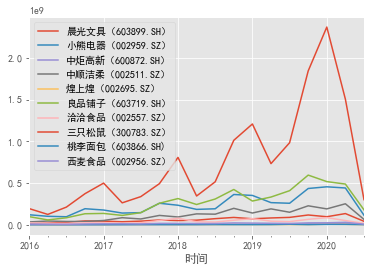

In [50]:
for name in Online_Quarter.columns:
    pd.to_numeric(Online_Quarter[name]).plot()
plt.legend()

<!-- CSMAR_DATA.columns = [
    '中顺洁柔', '洽洽食品', '煌上煌', '西麦食品', '小熊电器', '三只松鼠', '中炬高新', '良品铺子', '桃李面包',
    '晨光文具'
] -->

In [25]:
CSMAR_DATA.index

Index(['2016-01-01', '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
       '2017-01-01', '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
       '2018-01-01', '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
       '2019-01-01', '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
       '2020-03-31', '2020-06-30'],
      dtype='object', name='Accper')

In [54]:
#these are accumulate data, need process
# df.drop(df.index[[1,3]])
CSMAR_DATA = CSMAR_DATA.drop(CSMAR_DATA.index[[0, 5, 10, 15]])

In [56]:
CSMAR_DATA

Stkcd,002511,002557,002695,002956,002959,300783,600872,603719,603866,603899
Accper,,,,,,,,,,
2016-03-31,854090752.85,860855341.43,297062935.96,NaN,NaN,NaN,744203573.06,NaN,662040344.40,1133433054.53
2016-06-30,1771552660.77,1655847883.34,662636681.73,NaN,NaN,NaN,1490269461.06,NaN,1459698895.48,2179551131.29
2016-09-30,2740959078.00,2532158022.17,950361838.24,NaN,NaN,NaN,2296102937.77,NaN,2377194300.59,3452350475.53
2016-12-31,3809349072.13,3513011838.49,1217821558.54,NaN,NaN,NaN,3157988862.51,NaN,3305480010.00,4662465783.91
2017-03-31,1032246698.85,799497081.98,336220837.30,NaN,NaN,NaN,974197026.86,NaN,820164696.08,1412887390.59
2017-06-30,2123216428.96,1600144160.31,757522258.56,NaN,NaN,NaN,1804226822.82,NaN,1815759674.48,2785408071.06
2017-09-30,3352133786.61,2509962785.95,1132863657.17,NaN,NaN,NaN,2728665535.90,NaN,2955324232.73,4492999748.30
2017-12-31,4638349590.23,3602738165.48,1477780160.44,NaN,NaN,NaN,3609371700.99,NaN,4079709861.92,6357102964.25
2018-03-31,1224790878.97,1026891081.61,414858723.95,NaN,NaN,NaN,1153599668.70,NaN,988899071.86,1840309548.13


<!-- #2016
CSMAR_DATA.iloc[3] = pd.to_numeric(CSMAR_DATA.iloc[3], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[2], errors='coerce')
CSMAR_DATA.iloc[2] = pd.to_numeric(CSMAR_DATA.iloc[2], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[1], errors='coerce')
CSMAR_DATA.iloc[1] = pd.to_numeric(CSMAR_DATA.iloc[1], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[0], errors='coerce') -->

<!-- #2017
CSMAR_DATA.iloc[7] = pd.to_numeric(CSMAR_DATA.iloc[7], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[6], errors='coerce')
CSMAR_DATA.iloc[6] = pd.to_numeric(CSMAR_DATA.iloc[6], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[5], errors='coerce')
CSMAR_DATA.iloc[5] = pd.to_numeric(CSMAR_DATA.iloc[5], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[4], errors='coerce')
#2018
CSMAR_DATA.iloc[11] = pd.to_numeric(CSMAR_DATA.iloc[11], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[10], errors='coerce')
CSMAR_DATA.iloc[10] = pd.to_numeric(CSMAR_DATA.iloc[10], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[9], errors='coerce')
CSMAR_DATA.iloc[9] = pd.to_numeric(CSMAR_DATA.iloc[9], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[8], errors='coerce')
#2019
CSMAR_DATA.iloc[15] = pd.to_numeric(CSMAR_DATA.iloc[15], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[14], errors='coerce')
CSMAR_DATA.iloc[14] = pd.to_numeric(CSMAR_DATA.iloc[14], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[13], errors='coerce')
CSMAR_DATA.iloc[13] = pd.to_numeric(CSMAR_DATA.iloc[13], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[12], errors='coerce')
#2020
CSMAR_DATA.iloc[17] = pd.to_numeric(CSMAR_DATA.iloc[17], errors='coerce') - pd.to_numeric(CSMAR_DATA.iloc[16], errors='coerce') -->

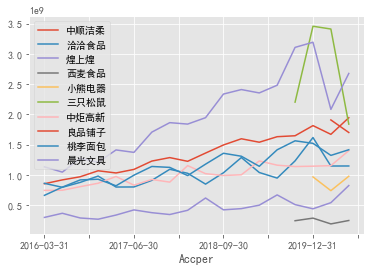

In [62]:
for name in CSMAR_DATA.columns:
    pd.to_numeric(CSMAR_DATA[name]).plot()
plt.legend()